Binning (Diskrinisasi)

Nilai Minimum: 4.3
Nilai Maksimum: 7.9


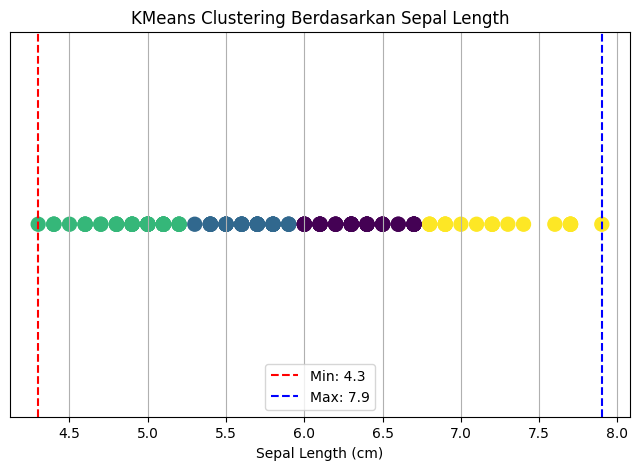


Pusat Cluster:
Cluster 0: 6.3446808510638295
Cluster 1: 5.623684210526315
Cluster 2: 4.886666666666667
Cluster 3: 7.235


In [4]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load data Iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# 2. Ambil hanya kolom sepal length (cm)
sepal_length = df[['sepal length (cm)']]

# 3. Tampilkan nilai minimum dan maksimum
min_val = sepal_length['sepal length (cm)'].min()
max_val = sepal_length['sepal length (cm)'].max()
print(f"Nilai Minimum: {min_val}")
print(f"Nilai Maksimum: {max_val}")

# 4. Clustering KMeans menjadi 4 cluster
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(sepal_length)

# 5. Visualisasi hasil cluster
plt.figure(figsize=(8,5))
plt.scatter(sepal_length, [0]*len(sepal_length), c=df['Cluster'], cmap='viridis', s=100)
plt.axvline(min_val, color='red', linestyle='--', label=f'Min: {min_val}')
plt.axvline(max_val, color='blue', linestyle='--', label=f'Max: {max_val}')
plt.xlabel('Sepal Length (cm)')
plt.title('KMeans Clustering Berdasarkan Sepal Length')
plt.yticks([])  # sembunyikan sumbu Y
plt.legend()
plt.grid(True)
plt.show()

# 6. Tampilkan pusat cluster
print("\nPusat Cluster:")
for i, center in enumerate(kmeans.cluster_centers_):
    print(f"Cluster {i}: {center[0]}")

Nilai Minimum: 4.3
Nilai Maksimum: 7.9


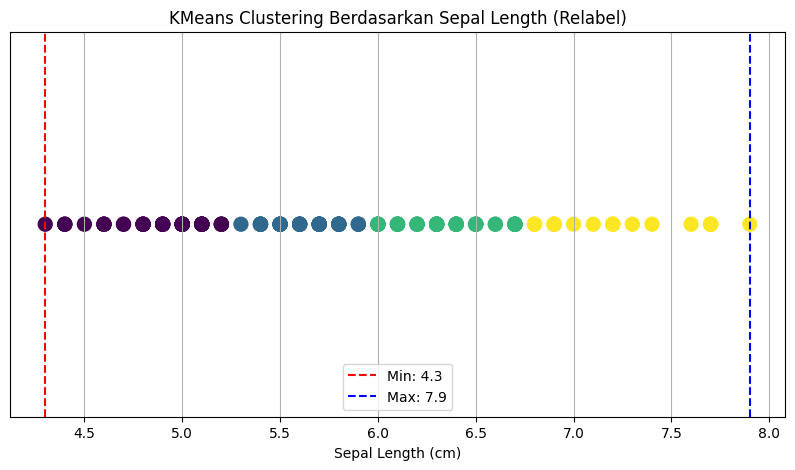


Pusat Cluster (sudah diurutkan sesuai label baru):
Cluster 0 (Kategori a): 4.887
Cluster 1 (Kategori b): 5.624
Cluster 2 (Kategori c): 6.345
Cluster 3 (Kategori d): 7.235

Data Sepal Length dengan Cluster dan Kategori:
     sepal length (cm)  Cluster Kategori
0                  5.1        0        a
1                  4.9        0        a
2                  4.7        0        a
3                  4.6        0        a
4                  5.0        0        a
5                  5.4        1        b
6                  4.6        0        a
7                  5.0        0        a
8                  4.4        0        a
9                  4.9        0        a
10                 5.4        1        b
11                 4.8        0        a
12                 4.8        0        a
13                 4.3        0        a
14                 5.8        1        b
15                 5.7        1        b
16                 5.4        1        b
17                 5.1        0        a
1

In [10]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Load data Iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# 2. Ambil hanya kolom sepal length (cm)
sepal_length = df[['sepal length (cm)']]

# 3. Tampilkan nilai minimum dan maksimum
min_val = sepal_length['sepal length (cm)'].min()
max_val = sepal_length['sepal length (cm)'].max()
print(f"Nilai Minimum: {min_val}")
print(f"Nilai Maksimum: {max_val}")

# 4. Clustering KMeans menjadi 4 cluster
kmeans = KMeans(n_clusters=4, random_state=42)
original_labels = kmeans.fit_predict(sepal_length)
df['Original_Cluster'] = original_labels

# 5. Dapatkan pusat cluster dan urutkan
centers = kmeans.cluster_centers_.flatten()
sorted_indices = np.argsort(centers)

# 6. Buat mapping baru untuk relabel (cluster kecil jadi 0, dst)
relabel_map = {old_label: new_label for new_label, old_label in enumerate(sorted_indices)}
df['Cluster'] = df['Original_Cluster'].map(relabel_map)

# 7. Buat kategori a, b, c, d dari cluster yang sudah urut
kategori_map = {0: 'a', 1: 'b', 2: 'c', 3: 'd'}
df['Kategori'] = df['Cluster'].map(kategori_map)

# 8. Visualisasi hasil cluster
plt.figure(figsize=(10, 5))
plt.scatter(sepal_length, [0]*len(sepal_length), c=df['Cluster'], cmap='viridis', s=100)
plt.axvline(min_val, color='red', linestyle='--', label=f'Min: {min_val}')
plt.axvline(max_val, color='blue', linestyle='--', label=f'Max: {max_val}')
plt.xlabel('Sepal Length (cm)')
plt.title('KMeans Clustering Berdasarkan Sepal Length (Relabel)')
plt.yticks([])  # sembunyikan sumbu Y
plt.legend()
plt.grid(True)
plt.show()

# 9. Tampilkan pusat cluster
print("\nPusat Cluster (sudah diurutkan sesuai label baru):")
for label in range(4):
    print(f"Cluster {label} (Kategori {kategori_map[label]}): {centers[sorted_indices[label]]:.3f}")

# 10. Tampilkan semua data
pd.set_option('display.max_rows', None)
print("\nData Sepal Length dengan Cluster dan Kategori:")
print(df[['sepal length (cm)', 'Cluster', 'Kategori']])

# 11. Tampilkan jumlah data tiap kategori
print("\nJumlah data per Kategori:")
print(df['Kategori'].value_counts().sort_index())

Nilai Minimum: 4.3
Nilai Maksimum: 7.9


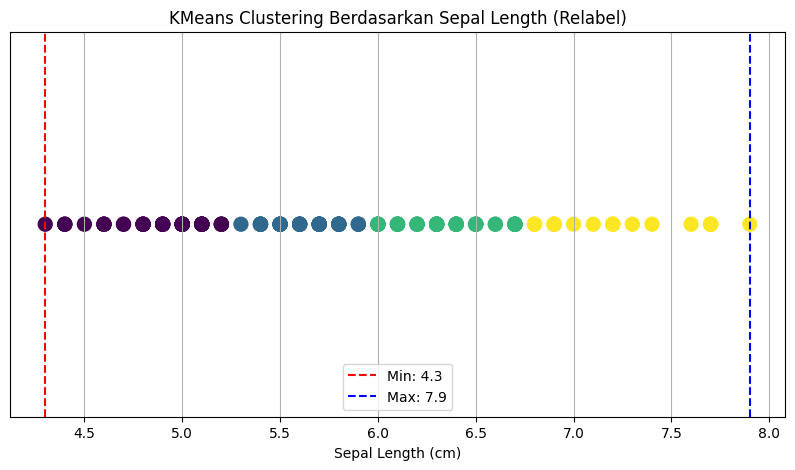


Pusat Cluster (urut):
Cluster 0 (Kategori a): 4.887
Cluster 1 (Kategori b): 5.624
Cluster 2 (Kategori c): 6.345
Cluster 3 (Kategori d): 7.235

Data Lengkap:
     sepal length (cm)  Cluster Kategori  sepal width (cm)  \
0                  5.1        0        a               3.5   
1                  4.9        0        a               3.0   
2                  4.7        0        a               3.2   
3                  4.6        0        a               3.1   
4                  5.0        0        a               3.6   
5                  5.4        1        b               3.9   
6                  4.6        0        a               3.4   
7                  5.0        0        a               3.4   
8                  4.4        0        a               2.9   
9                  4.9        0        a               3.1   
10                 5.4        1        b               3.7   
11                 4.8        0        a               3.4   
12                 4.8        0     

In [15]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Load data Iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# 2. Ambil hanya kolom sepal length
sepal_length = df[['sepal length (cm)']]

# 3. Tampilkan nilai min dan max sepal length
min_val = sepal_length['sepal length (cm)'].min()
max_val = sepal_length['sepal length (cm)'].max()
print(f"Nilai Minimum: {min_val}")
print(f"Nilai Maksimum: {max_val}")

# 4. Clustering KMeans menjadi 4 cluster
kmeans = KMeans(n_clusters=4, random_state=42)
original_labels = kmeans.fit_predict(sepal_length)
df['Original_Cluster'] = original_labels

# 5. Urutkan pusat cluster
centers = kmeans.cluster_centers_.flatten()
sorted_indices = np.argsort(centers)

# 6. Relabel cluster sesuai urutan
relabel_map = {old_label: new_label for new_label, old_label in enumerate(sorted_indices)}
df['Cluster'] = df['Original_Cluster'].map(relabel_map)

# 7. Mapping kategori a-d
kategori_map = {0: 'a', 1: 'b', 2: 'c', 3: 'd'}
df['Kategori'] = df['Cluster'].map(kategori_map)

# 8. Tambahkan kategori untuk fitur lain
# Sepal Width (3 kategori)
df['Sepal_Width_Kategori'] = pd.qcut(df['sepal width (cm)'], q=3, labels=['a', 'b', 'c'])

# Petal Length (4 kategori)
df['Petal_Length_Kategori'] = pd.qcut(df['petal length (cm)'], q=4, labels=['a', 'b', 'c', 'd'])

# Petal Width (3 kategori)
df['Petal_Width_Kategori'] = pd.qcut(df['petal width (cm)'], q=3, labels=['a', 'b', 'c'])

# 9. Visualisasi sepal length cluster
plt.figure(figsize=(10, 5))
plt.scatter(sepal_length, [0]*len(sepal_length), c=df['Cluster'], cmap='viridis', s=100)
plt.axvline(min_val, color='red', linestyle='--', label=f'Min: {min_val}')
plt.axvline(max_val, color='blue', linestyle='--', label=f'Max: {max_val}')
plt.xlabel('Sepal Length (cm)')
plt.title('KMeans Clustering Berdasarkan Sepal Length (Relabel)')
plt.yticks([])  # sembunyikan sumbu Y
plt.legend()
plt.grid(True)
plt.show()

# 10. Tampilkan pusat cluster
print("\nPusat Cluster (urut):")
for label in range(4):
    print(f"Cluster {label} (Kategori {kategori_map[label]}): {centers[sorted_indices[label]]:.3f}")

# 11. Tampilkan semua data
pd.set_option('display.max_rows', None)
print("\nData Lengkap:")
print(df[['sepal length (cm)', 'Cluster', 'Kategori',
          'sepal width (cm)', 'Sepal_Width_Kategori',
          'petal length (cm)', 'Petal_Length_Kategori',
          'petal width (cm)', 'Petal_Width_Kategori']])

# 12. Tampilkan ringkasan jumlah tiap kategori
print("\nJumlah data per Kategori Sepal Length:")
print(df['Kategori'].value_counts().sort_index())

print("\nJumlah data per Kategori Sepal Width:")
print(df['Sepal_Width_Kategori'].value_counts())

print("\nJumlah data per Kategori Petal Length:")
print(df['Petal_Length_Kategori'].value_counts().sort_index())

print("\nJumlah data per Kategori Petal Width:")
print(df['Petal_Width_Kategori'].value_counts())
